# Confidence Intervals

## Learning Goals

- Describe the use of confidence intervals
- Construct confidence intervals for z and t distributions


In [1]:
# Imports!
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Motivation & Intuition

Ever have an appointment with the cable company to setup your cable and/or internet?

![xfinity logo](https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Xfinity_2017.svg/220px-Xfinity_2017.svg.png)

What did they tell you when they scheduled that appointment? 

Something like
> We'll be at your home between 7am to 8pm 

And they're usually right. This is close to how we use **confidence intervals**

## Balancing Precision and Uncertainty

When we sample a population, we'd like to use the sample to tell us something about the population. But we're never 100% sure that the sample statistic (like the mean) is reflective of the population's true value. Maybe we sampled a bunch of weird data points.

There is a **trade-off** here between precision and certainty: The more precise we are in our estimate of a population parameter, the less certain we can be in our estimate, and vice versa.

Sometimes it's important to be certain, and so we'll make our estimates relatively imprecise (like a window for an appointment to hook up cable). Other times it's important to be precise, and so we'll sacrifice a level of certainty for that precision.

### 🧠 Knowledge Check

Say we get a sample from our population and measure the mean. What factors would make us more or less confident in drawing conclusions about the population?

- Large sameple - more
- Similar means - more


## Confidence Intervals

Because sample statistics are imperfect representations of the true population values, it is often appropriate to state these estimates with **confidence intervals**.

Before proceeding, let's talk about how to _interpret_ a confidence interval.

Suppose our nature correspondent (or David Attenborough) takes several hundred measurements of parrot beak lengths in the Ganges river basin and calculates an average beak length of 9cm. He reports this measure by saying that the 90% confidence interval is (8.6, 9.4).

This does NOT mean that 90% of beaks are somewhere between 8.6cm and 9.4cm. Rather, what our correspondent means is that, if we were to conduct the same measuring experiment many times, constructing intervals in the same way, **we should expect 90% of those intervals to contain the true population mean.**

Again, for emphasis: 

> "The **95%** in a **95% confidence interval** tells us that if we calculated a confidence interval from **100** different samples, about **95** of them would contain the **true population mean**."

-- [Crash Course Statistic's video on Confidence Intervals](https://youtu.be/yDEvXB6ApWc)

### So, how do we calculate them?

The confidence interval we construct will depend on the statistics of our sample:

> * Our measured/observed **sample mean**
> * Our **sample size**
> * The underlying distribution of our data 
>     - _Is it a normal distribution?_

The confidence interval will be centered on our sample mean. To construct the endpoints we step out from the center based on the amount of variance allowed by our confidence level.

We decide our confidence level - do we want to be 80% confident? 90%? 95%? 99%? 

Based on what we choose, we can then figure out our **margin of error**.

### Margin of Error

> ### Margin of Error = Critical Value * Sample Standard Error

![source: https://courses.lumenlearning.com/wmopen-concepts-statistics/chapter/estimating-a-population-mean-3-of-3/](https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1729/2017/04/15032548/m10_inference_mean_topic_10_2_m10_est_pop_means_3_image1.png)

Let's break down those two component parts:

### Critical Value

First things first - need your alpha ($\alpha$). This is what you set when you pick your confidence level!

$$\large \alpha = 1 - \text{Confidence Level}$$

So, if you pick a 95% confidence level, then $\alpha$ = 1 - .95 = .05

BUT because you want to be confident on either side, this actually ends up being divided by 2! 
$$.05 / 2 = \large.025$$ 
This is the percentage of "acceptable" error on either side.

Why does this matter? Because you'll feed this value into your search for your critical value - a value which comes from the probability at the point at which there's 2.5% on each side.

### Standard Error

The standard error is the standard deviation of the sampling distribution. The issue is that a sample is not an exact replica of the population. We need to account for that in order to make our estimate of the $\mu$ value possible. 

Let's break it down:

**Population standard deviation**

$$\large \sigma _{x} = \frac{\sigma }{\sqrt{n}}$$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

**What if we do not know the population standard deviation?** (which is most of the time)

If we do not know the population standard deviation, we can approximate for it with the sample standard deviation, balanced by the sample size

$$\large \sigma _{x} ≈ \frac{s}{\sqrt{n}}$$

- s = sample standard deviation
- n = sample size

## Time for Python!

Now that we know the pieces and what we need to calculate - we can just do this in Python.

In [2]:
# Read in our data
df = pd.read_csv("data/City_of_Seattle_Wage_Data_031422.csv")

# Rename our columns
df = df.rename(columns=lambda x: x.replace(" ", ""))

# Check it
df.head()

,Department,LastName,FirstName,JobTitle,HourlyRate
0,Seattle Public Utilities,Batchelor,Craig,"Civil Engrng Spec,Sr",53.740
1,Finance & Admin Services,Altice,Jeffrey,Auto Mechanic,39.780
2,Finance & Admin Services,Montes,Valeria,Cust Svc Rep,29.450
3,Fire Department,Kuklok,Rebecca,Cust Svc Rep *,29.450
4,Planning & Comm Development,Quirindongo,Rico,Executive3,97.164


In [3]:
# Let's check out our population parameters
pop_mean = df['HourlyRate'].mean()
pop_std = df['HourlyRate'].std()

print(f"Population Mean: {pop_mean:.2f}, Population Standard Deviation: {pop_std:.2f}")

Population Mean: 47.82, Population Standard Deviation: 16.72


Now let's take a sample, construct a confidence interval for our sample statistic, and compare!

In [4]:
# Grab a single sample
n = 30 # 30 employees in our sample
sample = df.sample(n=n) 

In [5]:
# Grab our sample statistics
sample_mean = np.mean(sample['HourlyRate'])
sample_std = np.std(sample['HourlyRate'], ddof=1) # Using 1 'degree of freedom'

print(f"Sample Mean: {sample_mean:.2f}, Sample Standard Deviation: {sample_std:.2f}")

Sample Mean: 44.92, Sample Standard Deviation: 16.48


### Quick Aside: T-Distribution vs. Normal

![z vs t](images/z_vs_t.png)

If data is mostly normally distributed, we use the true Gaussian normal distribution when: 

- n > 100
- population standard deviation is known

Otherwise, we use the Student's T-Distribution, which has longer tails than a true Gaussian distribution and which accounts for sample size - but, as sample size increases, it looks closer and closer like the true normal distribution.

For our purposes, although we know our 'population' standard deviation, let's use the Student's T since we have less than 50 in our sample.

In [6]:
# Stats library! Calculating our critical value up until our 2.5%

t_value = stats.t.ppf(0.975, n-1) # N-1 shows the 'degrees of freedom'

In [7]:
# Calculate our standard error
samp_standard_error = sample_std / np.sqrt(n)

In [8]:
# Calculate our margin of error
margin_error = t_value * samp_standard_error

# Now - the interval!
interval_min = sample_mean - margin_error
interval_max = sample_mean + margin_error
print(f"95% confident our population mean is between {interval_min:.3f} and {interval_max:.3f}")

95% confident our population mean is between 38.769 and 51.075


In [9]:
# Of course, there's also:
stats.t.interval(alpha=0.95,
                 loc = sample_mean,
                 scale = stats.sem(sample['HourlyRate']),
                 df=n-1)

(38.76929029916319, 51.074709700836806)

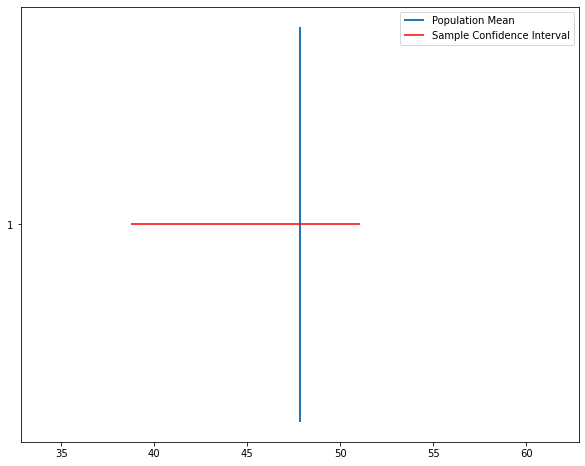

In [10]:
# Now let's see

plt.figure(figsize=(10, 8))

plt.vlines(pop_mean, 0, 2, lw=2,
           label='Population Mean')

plt.hlines(1, interval_min, interval_max, color='r', 
           label='Sample Confidence Interval')

plt.xlim(pop_mean-15, pop_mean+15)
plt.yticks(ticks=[1])
plt.legend()
plt.show()

Let's interpret: what does this show us?

- Shows where confidence interval intercepts


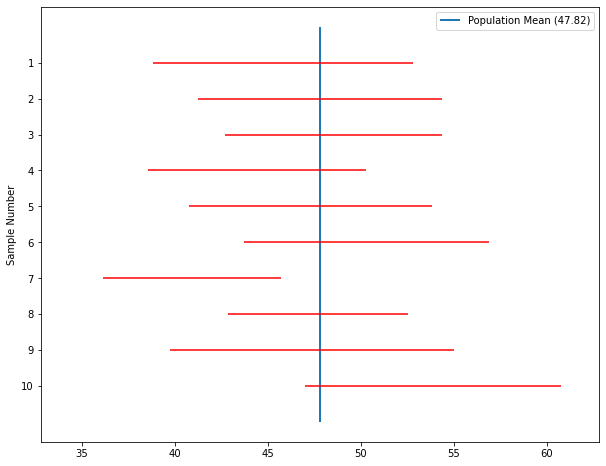

In [12]:
# Now let's do all this for 10 samples!

intervals = []

for x in range(10):
    samp = df.sample(n=n) # Remember, n = 50 employees
    samp_mean = np.mean(samp['HourlyRate'])
    samp_std = np.std(samp['HourlyRate'], ddof=1)
    
    samp_sterr = samp_std / (n ** 0.5)
    margin_error = stats.t.ppf(0.975, n-1) * samp_sterr
    int_min = samp_mean - margin_error
    int_max = samp_mean + margin_error
    intervals.append([int_min, int_max])
    
plt.figure(figsize=(10, 8))

plt.vlines(pop_mean, 0, 11, lw=2, label=f'Population Mean ({pop_mean:.2f})')

for x in range(10):
    plt.hlines(x+1, intervals[x][0], intervals[x][1], color='r')

plt.ylabel("Sample Number")
plt.xlim(pop_mean-15, pop_mean+15)
plt.yticks(ticks = range(1,11))
plt.gca().invert_yaxis()
plt.legend()
plt.show()

Let's interpret - how'd we do?

- 


## Again, For Emphasis: Interpreting Confidence Intervals

Wrong!!
> ~~95% of ages are within our confidence interval~~

Correct:
> We are 95% confident that our actual mean population age is contained within our confidence interval.

We are confident in this interval because we expect that a true population mean outside of this interval would produce these results 5% or less of the time. In other words, only an unlikely (but not impossible) sampling event could have caused us to calculate this interval, if the true mean is outside of this interval.


**The true population mean is a specific value and we do not know what it is.** The confidence level you choose is a question of how often you are willing to find an interval that does not include the true population mean, but it doesn't tell you whether this particular sample + interval calculation gave you the "right" answer.

## Key Points

- **Sample statistics** are _supplemented_ with **confidence intervals** to approximate the population
- We generally believe that a **sample statistic** is in the _neighborhood_ of true population's parameter
- The larger the sample, the less likely we got all the "weirdo" data points from the population
- We **trade certainty with precision** by expanding our interval
- Taking multiple samples (experiments) gives us a better idea of where the true population parameter value lies

# Level Up! Exercise Time 💪🏼

Your turn!

You're weighing walruses in the Arctic in an attempt to estimate the mean weight of the Canadian walrus population. You have a sample of 30 walrus weights. The mean of the sample is 2000 lbs and the standard deviation is 200 lbs. 


1. Calculate the 80%-confidence interval. 
2. Calculate the 70%-confidence interval.
3. How do they compare to the normal-distribution CIs? (to calculate the latter, just use the sample standard deviation)

In [19]:
# Your code here

n = 30
standard_dev = 200
sample_mean = 2000

stats.t.interval(alpha=0.80,
                 loc = sample_mean,
                 scale = standard_dev,
                 df=n-1)

(1737.7132698984606, 2262.286728790106)

In [18]:
n = 30
standard_dev = 200
sample_mean = 2000

stats.t.interval(alpha=0.70,
                 loc = sample_mean,
                 scale = standard_dev,
                 df=n-1)

(1788.9395507444096, 2211.0604492555904)

In [20]:
# statistics
n = 30
x_bar = 2000
s = 200
# calculate t-values
t_value80 = stats.t.ppf(0.9, n-1)
t_value70 = stats.t.ppf(0.85, n-1)
# calculate t-margins of error
margin_error80 = t_value80 * 200/(n**0.5)
margin_error70 = t_value70 * 200/(n**0.5)
# calculate 70%- and 80%-intervals
conf_int80 = (x_bar - margin_error80, x_bar + margin_error80)
conf_int70 = (x_bar - margin_error70, x_bar + margin_error70)
# calculate z-values
z_score80 = stats.norm.ppf(0.9)
z_score70 = stats.norm.ppf(0.85)
# calculate z-margins of error
error_norm80 = z_score80 * 200/(n**0.5)
error_norm70 = z_score70 * 200/(n**0.5)
# calculate 70%- and 80%-intervals
conf_norm80 = (x_bar - error_norm80, x_bar + error_norm80)
conf_norm70 = (x_bar - error_norm70, x_bar + error_norm70)
# print out results
print(conf_int80)
print(conf_int70)
print(conf_norm80)
print(conf_norm70)

(1952.1132140358065, 2047.8867859641935)
(1961.4658103151796, 2038.5341896848204)
(1953.2043532630107, 2046.7956467369893)
(1962.154803548181, 2037.845196451819)


<details>
    <summary>Answer</summary>
<code># statistics
n = 30
x_bar = 2000
s = 200
# calculate t-values
t_value80 = stats.t.ppf(0.9, n-1)
t_value70 = stats.t.ppf(0.85, n-1)
# calculate t-margins of error
margin_error80 = t_value80 * 200/(n**0.5)
margin_error70 = t_value70 * 200/(n**0.5)
# calculate 70%- and 80%-intervals
conf_int80 = (x_bar - margin_error80, x_bar + margin_error80)
conf_int70 = (x_bar - margin_error70, x_bar + margin_error70)
# calculate z-values
z_score80 = stats.norm.ppf(0.9)
z_score70 = stats.norm.ppf(0.85)
# calculate z-margins of error
error_norm80 = z_score80 * 200/(n**0.5)
error_norm70 = z_score70 * 200/(n**0.5)
# calculate 70%- and 80%-intervals
conf_norm80 = (x_bar - error_norm80, x_bar + error_norm80)
conf_norm70 = (x_bar - error_norm70, x_bar + error_norm70)
# print out results
print(conf_int80)
print(conf_int70)
print(conf_norm80)
print(conf_norm70)</code>

# Level Up: Confidence Intervals for Non-Normally Distributed Data

One of the most commonly used strategies for dealing with non-normally distributed data is to find a way to reduce the problem to one that involves normally distributed data!

[Here](https://file.scirp.org/Html/3-1240887_76758.htm) is a review article that compares several different strategies. (Note that it ultimately recommends a sort of Bayesian method. We'll get to Bayesian reasoning in a later lesson.)

# Level Up: Bootstrap

One method of getting the confidence interval is to use **bootstrap** sampling. The idea is that we sample our sample to get an idea of what extreme values we could have got when sampling the population. With this, we can construct a confidence interval for our sample of the population 

The important to realize is we _only use our sample_ to determine the confidence interval.

![Sampling from population](https://github.com/flatiron-school/ds-central_limit_theorem/raw/008cecd491af6cf1df358903b6df622aac54c999/img/sample_pop.png)

Below is an example of how this can be done.

## Example

In [21]:
# External file
titanic_file = 'https://github.com/MrGeislinger/flatiron-school-data-science-curriculum-resources/raw/main/ProbabilityAndStats/StatisticalDistributions/data/titanic.csv'
df_titanic = pd.read_csv(titanic_file)
ages = df_titanic.Age.dropna()

0.42

80.0

14.516321150817316

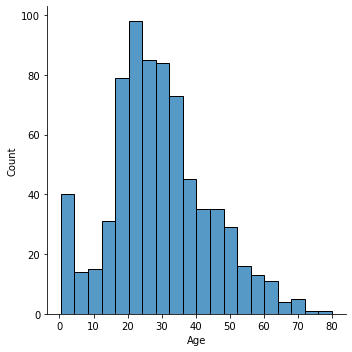

In [22]:
sns.displot(ages)
display(np.min(ages), np.max(ages), np.std(ages))

In [23]:
# Get an example sample
sample = ages.sample(10, replace=True)
print(sample.mean())
display(sample)


24.492


803     0.42
133    29.00
79     30.00
691     4.00
744    31.00
663    36.00
134    25.00
777     5.00
695    52.00
122    32.50
Name: Age, dtype: float64

In [24]:
def get_all_sample_means(data, n=10, n_samples=100):
    '''
    '''
    #
    samples = np.random.choice(data, size=(n_samples, n))
    means = np.mean(samples, axis=1)
    #
    return means

In [25]:
# Get many samples and their respective means
samples = get_all_sample_means(ages, n=10, n_samples=30)
samples

array([23.6  , 24.6  , 28.2  , 31.   , 31.8  , 28.3  , 23.975, 33.6  ,
       32.65 , 31.4  , 27.   , 27.9  , 26.3  , 30.8  , 34.7  , 27.3  ,
       27.2  , 37.6  , 27.6  , 26.925, 30.15 , 34.35 , 32.   , 28.1  ,
       33.6  , 27.9  , 28.1  , 28.8  , 31.4  , 25.7  ])

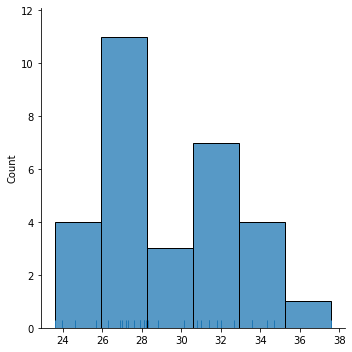

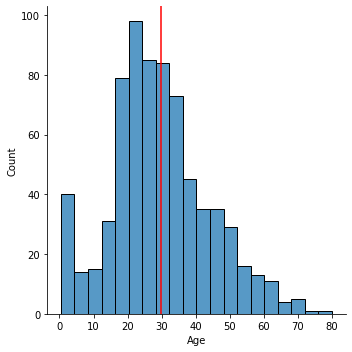

In [26]:
# See the sample and the full data compared
sns.displot(
    samples,    # Shows sample means
    rug=True
)
sns.displot(ages)
plt.axvline(ages.mean(), color='red');

### Finding the Confidence Interval

In [27]:
def bootstrap_sample(sample, n_samples=10**4):
    '''
    '''
    #
    bs_sample_means = get_all_sample_means(
        sample, 
        n=len(sample),
        n_samples=n_samples
    )
    
    return bs_sample_means

In [28]:
b_sample_means = bootstrap_sample(sample)
display(np.mean(sample))
display(b_sample_means)

24.492

array([22.334, 21.342, 17.626, ..., 22.642, 20.992, 21.034])

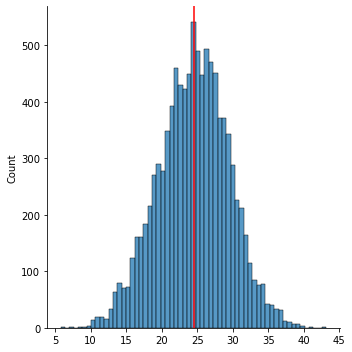

In [29]:
sns.displot(b_sample_means)
plt.axvline(b_sample_means.mean(), color='red');

In [30]:
np.mean(b_sample_means)

24.5043844

In [31]:
two_std = np.std(b_sample_means)*2
(np.mean(sample)-two_std, np.mean(sample)+two_std)

(14.563210600231942, 34.42078939976806)